In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-logos/apple_logo2.jpg
/kaggle/input/apple-logos/apple_logo4.jpg
/kaggle/input/apple-logos/apple_logo1.jpg
/kaggle/input/apple-logos/apple_logo3.jpg
/kaggle/input/android-logos/android-logo-android-robot-umbrella-rain-green-3840x2160-1571.jpg
/kaggle/input/android-logos/mohamed-nohassi-7td0XPp3ZuQ-unsplash.jpg
/kaggle/input/android-logos/wallpaperflare.com_wallpaper (1).jpg
/kaggle/input/apple-logo/apple_logo.jpg
/kaggle/input/negative-reviews-by-clients-for-ride-sharing-app/neg_clients_reviews.csv


In [2]:
import pandas as pd
import nltk
from nltk import word_tokenize,FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, QuadgramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.metrics.association import QuadgramAssocMeasures
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,ImageColorGenerator
from wordcloud import STOPWORDS
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('vader_lexicon')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
df=pd.read_csv('/kaggle/input/negative-reviews-by-clients-for-ride-sharing-app/neg_clients_reviews.csv')

In [4]:
df.head()

,app_download_key,platform,download_ts,session_id,user_id,age_range,signup_ts,ride_id,driver_id,request_ts,...,pickup_ts,dropoff_ts,cancel_ts,transaction_id,purchase_amount_usd,charge_status,transaction_ts,review_id,rating,review
0,cc3084e020b5744c17888b471f99d507,android,2021-07-07 05:55:30,cc3084e020b5744c17888b471f99d507,109056,18-24,2021-07-07 12:12:30,3000130,116060,2021-12-01 16:11:00,...,2021-12-01 16:19:00,2021-12-01 16:42:00,NaN,10000077,24.79,Approved,2021-12-01 16:42:00,50052,1,Horrible service. The driver was reckless and ...
1,b9fe1f921bdc232cb6ab15968aeb2fdb,ios,2021-11-09 23:36:30,b9fe1f921bdc232cb6ab15968aeb2fdb,115158,35-44,2021-11-10 11:26:30,3000172,102602,2021-11-11 17:56:00,...,2021-11-11 18:11:00,2021-11-11 18:36:00,NaN,10000097,13.92,Approved,2021-11-11 18:36:00,50063,1,"A nightmare experience. The driver was rude, a..."
2,26b44061ec0f3ce2fe2cc41e7c648568,ios,2021-04-26 16:08:02,26b44061ec0f3ce2fe2cc41e7c648568,105560,25-34,2021-04-27 11:27:02,3000198,108125,2021-06-20 08:43:00,...,2021-06-20 08:55:00,2021-06-20 10:10:00,NaN,10000115,16.75,Approved,2021-06-20 10:10:00,50074,1,Terrible experience with Metrocar. The driver ...
3,2b28046a86cf0e4afc0911eea42cb4e1,ios,2021-10-23 20:56:54,2b28046a86cf0e4afc0911eea42cb4e1,114348,Unknown,2021-10-23 22:18:54,3000372,110636,2021-10-24 08:01:00,...,2021-10-24 08:06:00,2021-10-24 08:39:00,NaN,10000220,18.17,Approved,2021-10-24 08:39:00,50150,2,A subpar experience. The driver seemed disinte...
4,3f783386efd79a616acc8b66452887fd,ios,2021-06-22 17:44:29,3f783386efd79a616acc8b66452887fd,108353,25-34,2021-06-24 04:37:29,3000398,101257,2021-06-27 16:44:00,...,2021-06-27 16:59:00,2021-06-27 18:09:00,NaN,10000236,15.35,Approved,2021-06-27 18:09:00,50159,2,Not a great ride with Metrocar. The driver see...


In [5]:
df.columns

Index(['app_download_key', 'platform', 'download_ts', 'session_id', 'user_id',
       'age_range', 'signup_ts', 'ride_id', 'driver_id', 'request_ts',
       'accept_ts', 'pickup_location', 'dropoff_location', 'pickup_ts',
       'dropoff_ts', 'cancel_ts', 'transaction_id', 'purchase_amount_usd',
       'charge_status', 'transaction_ts', 'review_id', 'rating', 'review'],
      dtype='object')

In [6]:
#drop unnecessairly features
df.drop(columns=['app_download_key', 'download_ts', 'session_id','signup_ts', 'ride_id','cancel_ts', 'transaction_id','charge_status', 'transaction_ts'],inplace=True)

In [7]:
df.groupby('platform')['platform'].count()

platform
android    11791
ios        25280
web         4112
Name: platform, dtype: int64

In [8]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

In [9]:
all_words = []
for review in df['review']:
    all_words.extend(preprocess_text(review))

In [10]:
freq_dist = FreqDist(all_words)
print("Most common words:")
print(freq_dist.most_common(20))  # Adjust the number based on your preference

Most common words:
[('driver', 41183), ('ride', 16500), ('metrocar', 13297), ('service', 9317), ('experience', 9077), ('unprofessional', 7276), ('rude', 7218), ('uncomfortable', 7188), ('car', 7123), ('terrible', 6116), ('app', 5231), ('late', 5181), ('vehicle', 5093), ('poor', 5089), ('route', 5072), ('drove', 4211), ('canceled', 4210), ('leaving', 4210), ('stranded', 4210), ('disappointed', 4188)]


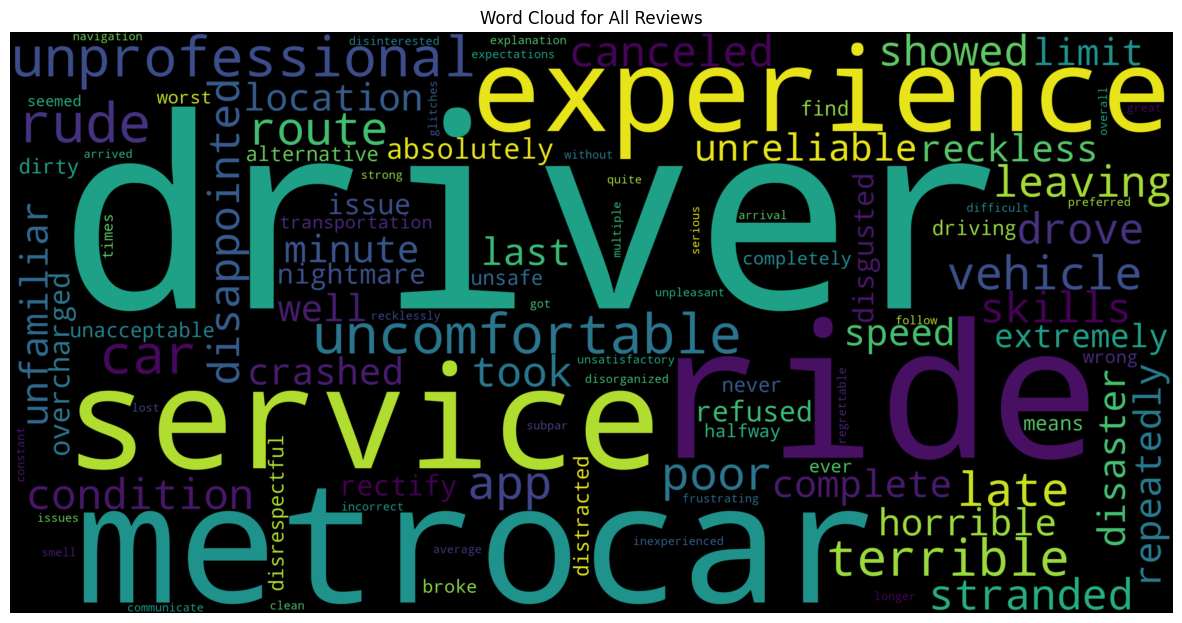

In [11]:
# Create a word cloud for all reviews
wordcloud_all = WordCloud(width=3000,height=1500,background_color='black').generate_from_frequencies(freq_dist)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for All Reviews')
plt.show()

In [12]:
df_android=df[df['platform']=='android']
df_ios=df[df['platform']=='ios']

In [13]:
all_words_ios = []
for review in df_ios['review']:
    all_words_ios.extend(preprocess_text(review))
freq_dist_ios = FreqDist(all_words_ios)
print("Most common words:")
print(freq_dist_ios.most_common(20))  # Adjust the number based on your preference    


Most common words:
[('driver', 25280), ('ride', 10134), ('metrocar', 8163), ('service', 5779), ('experience', 5570), ('rude', 4431), ('unprofessional', 4424), ('car', 4405), ('uncomfortable', 4402), ('terrible', 3753), ('late', 3203), ('app', 3185), ('vehicle', 3139), ('poor', 3124), ('route', 3075), ('drove', 2639), ('canceled', 2575), ('leaving', 2575), ('stranded', 2575), ('skills', 2524)]


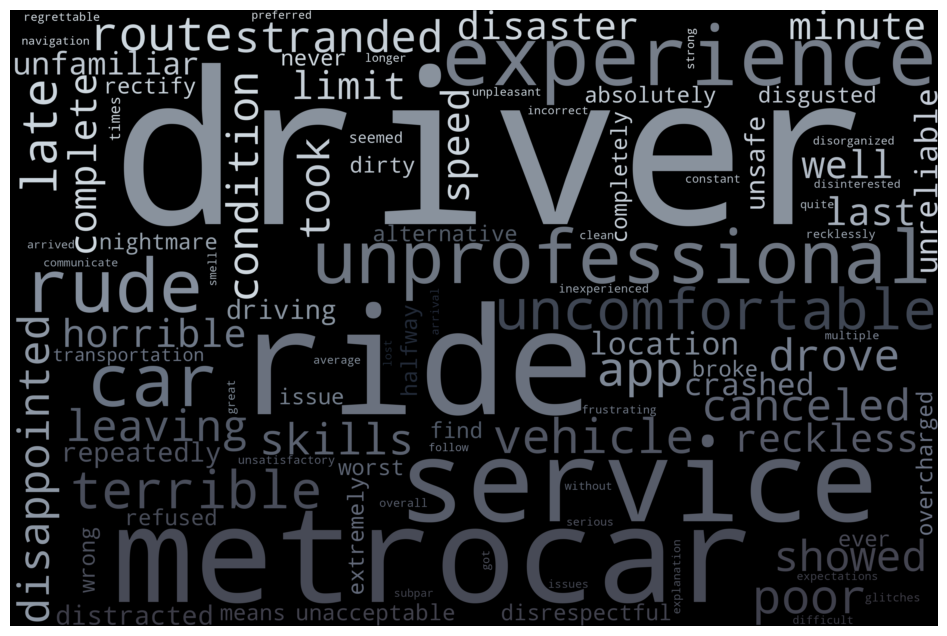

In [14]:
# Load the Apple background image (specify the path within your Kaggle environment)
apple_mask = np.array(Image.open("/kaggle/input/apple-logo/apple_logo.jpg"))

# Generate a word cloud for iOS reviews with the Apple background
wordcloud_ios_apple = WordCloud(mask=apple_mask,width=3000,height=1500).generate_from_frequencies(freq_dist_ios)

# create coloring from image
image_colors = ImageColorGenerator(apple_mask)
plt.figure(figsize=[15,8])
plt.imshow(wordcloud_ios_apple.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()


In [15]:
pos_tags_ios=nltk.pos_tag(all_words_ios)
# Extract nouns and adjectives
nouns_ios = [word for word, pos in pos_tags_ios if pos.startswith('N')]
adjectives_ios = [word for word, pos in pos_tags_ios if pos.startswith('J')]

In [16]:
# Create frequency distributions for nouns and adjectives
freq_dist_nouns_ios = FreqDist(nouns_ios)
freq_dist_adjectives_ios = FreqDist(adjectives_ios)

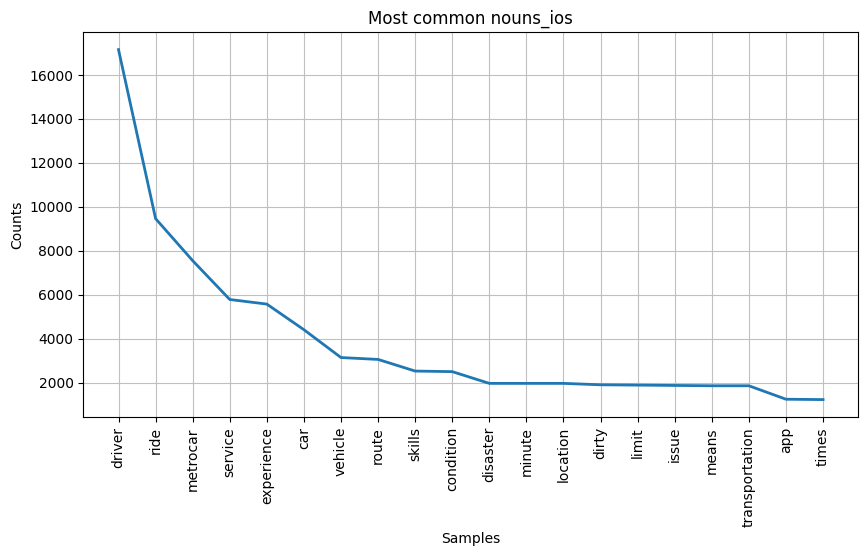

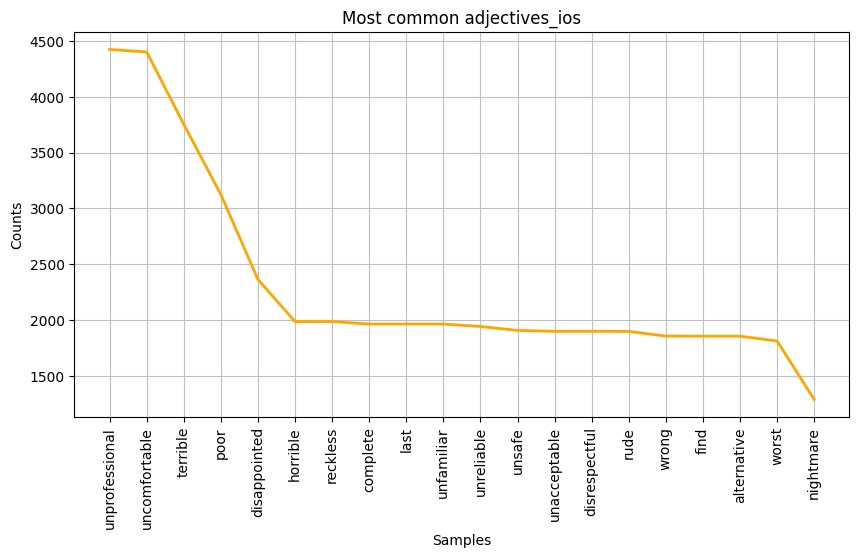

In [17]:
# Plot the most common nouns
plt.figure(figsize=(10, 5))
freq_dist_nouns_ios.plot(20, cumulative=False,title='Most common nouns_ios')
plt.show()

# Plot the most common adjectives
plt.figure(figsize=(10, 5))
freq_dist_adjectives_ios.plot(20, cumulative=False,title='Most common adjectives_ios',color='orange')
plt.show()

In [18]:
all_words_android = []
for review in df_android['review']:
    all_words_android.extend(preprocess_text(review))
freq_dist_android = FreqDist(all_words_android)
print("Most common words:")
print(freq_dist_android.most_common(20))     


Most common words:
[('driver', 11791), ('ride', 4687), ('metrocar', 3816), ('service', 2666), ('experience', 2618), ('uncomfortable', 2078), ('rude', 2077), ('unprofessional', 2066), ('car', 2013), ('terrible', 1766), ('app', 1485), ('poor', 1479), ('route', 1472), ('vehicle', 1471), ('late', 1417), ('disappointed', 1233), ('canceled', 1205), ('leaving', 1205), ('stranded', 1205), ('skills', 1192)]


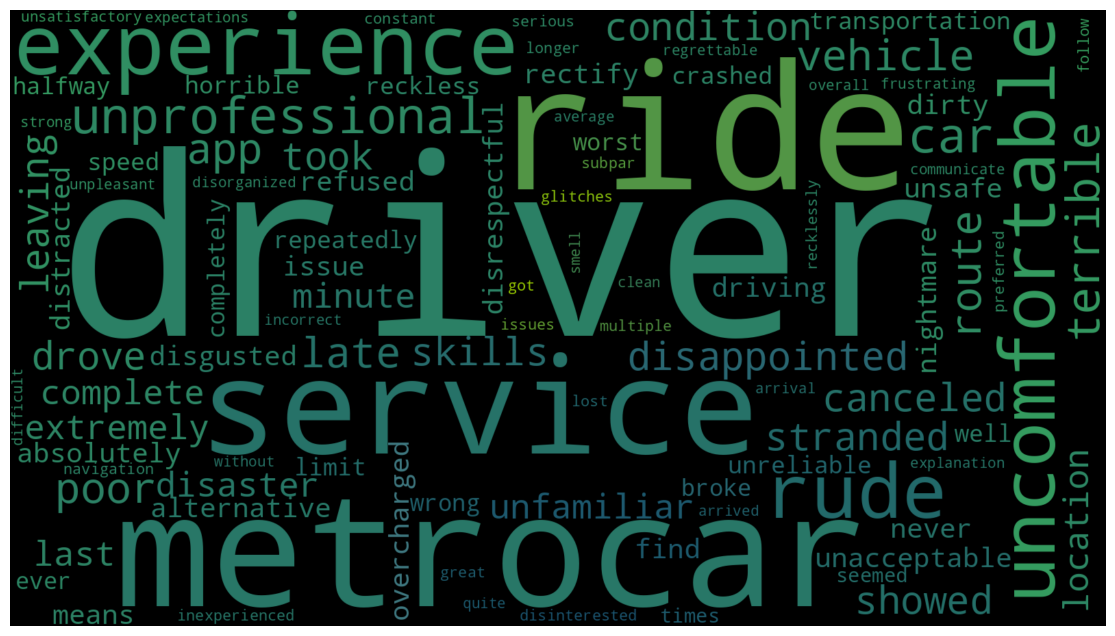

In [19]:
# Load the Android background image (specify the path within your Kaggle environment)
android_mask = np.array(Image.open("/kaggle/input/android-logos/wallpaperflare.com_wallpaper (1).jpg"))

# Generate a word cloud for iOS reviews with the Apple background
wordcloud_android = WordCloud(mask=android_mask,width=3000,height=1500).generate_from_frequencies(freq_dist_android)

# create coloring from image
image_colors = ImageColorGenerator(android_mask)
plt.figure(figsize=[15,8])
plt.imshow(wordcloud_android.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()


In [20]:
pos_tags_android=nltk.pos_tag(all_words_android)
# Extract nouns and adjectives
nouns_android = [word for word, pos in pos_tags_android if pos.startswith('N')]
adjectives_andoid = [word for word, pos in pos_tags_android if pos.startswith('J')]

In [21]:
# Create frequency distributions for nouns and adjectives
freq_dist_nouns_android = FreqDist(nouns_android)
freq_dist_adjectives_android = FreqDist(adjectives_andoid)

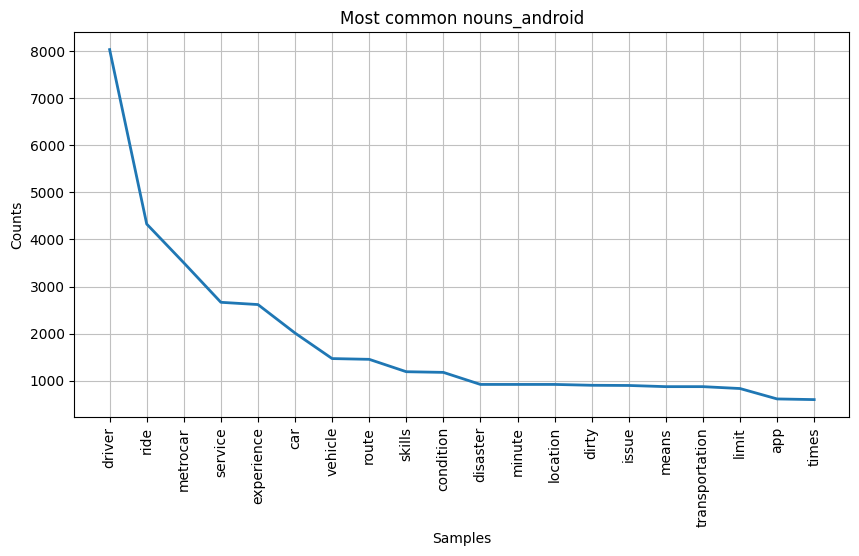

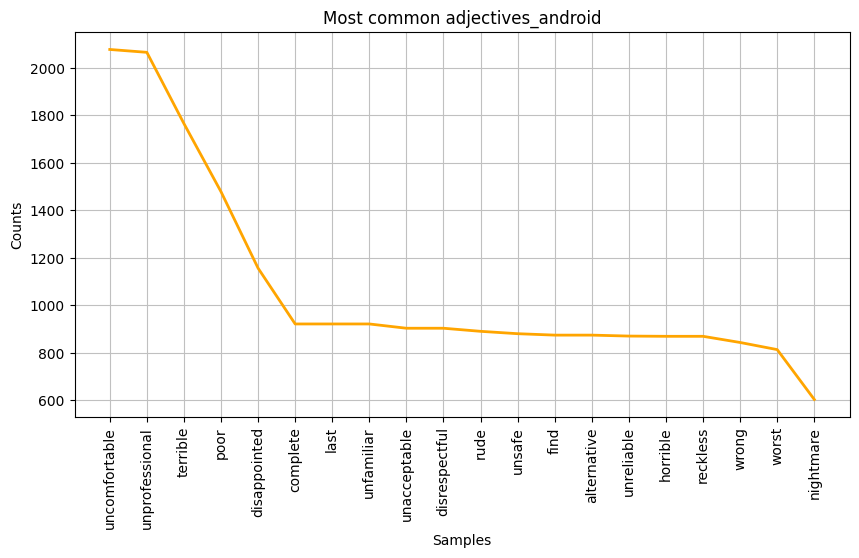

In [22]:
# Plot the most common nouns
plt.figure(figsize=(10, 5))
freq_dist_nouns_android.plot(20, cumulative=False,title='Most common nouns_android')
plt.show()

# Plot the most common adjectives
plt.figure(figsize=(10, 5))
freq_dist_adjectives_android.plot(20, cumulative=False,title='Most common adjectives_android',color='orange')
plt.show()

In [23]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply the sentiment analyzer to the 'review' column
df['sentiment_scores'] = df['review'].apply(get_sentiment_scores)

# Extract compound scores (overall sentiment) and assign labels
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment_label'] = df['compound_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')

# Display the results
df[['review', 'compound_score', 'sentiment_label']].tail(7)

,review,compound_score,sentiment_label
41176,A complete disaster. The driver canceled the r...,-0.6249,negative
41177,A subpar experience. The driver seemed disinte...,0.0000,positive
41178,Worst ride ever. The driver took a completely ...,-0.8832,negative
41179,Extremely disappointed. The driver was rude an...,-0.9061,negative
41180,Worst ride ever. The driver took a completely ...,-0.8832,negative
41181,Had some serious issues with Metrocar. The dri...,-0.6908,negative
41182,Worst ride ever. The driver took a completely ...,-0.8832,negative


In [24]:
df['compound_score'].describe()

count    41183.000000
mean        -0.617692
std          0.265263
min         -0.906100
25%         -0.726900
50%         -0.643700
75%         -0.510600
max          0.624900
Name: compound_score, dtype: float64

In [25]:
tokenized_reviews = [preprocess_text(review) for review in df['review']]

In [26]:
# Flatten the list of lists
flat_tokenized_reviews = [word for sublist in tokenized_reviews for word in sublist]

# Create TrigramCollocationFinder
finder = TrigramCollocationFinder.from_words(flat_tokenized_reviews)
finder.ngram_fd.most_common(10)

[(('ride', 'metrocar', 'driver'), 5155),
 (('driver', 'canceled', 'ride'), 4210),
 (('driver', 'rude', 'car'), 4099),
 (('experience', 'metrocar', 'driver'), 4028),
 (('complete', 'disaster', 'driver'), 3220),
 (('disaster', 'driver', 'canceled'), 3220),
 (('canceled', 'ride', 'last'), 3220),
 (('ride', 'last', 'minute'), 3220),
 (('last', 'minute', 'leaving'), 3220),
 (('minute', 'leaving', 'stranded'), 3220)]

In [27]:
finder4 = QuadgramCollocationFinder.from_words(flat_tokenized_reviews)
finder4.ngram_fd.most_common(10)

[(('complete', 'disaster', 'driver', 'canceled'), 3220),
 (('disaster', 'driver', 'canceled', 'ride'), 3220),
 (('driver', 'canceled', 'ride', 'last'), 3220),
 (('canceled', 'ride', 'last', 'minute'), 3220),
 (('ride', 'last', 'minute', 'leaving'), 3220),
 (('last', 'minute', 'leaving', 'stranded'), 3220),
 (('minute', 'leaving', 'stranded', 'unfamiliar'), 3220),
 (('leaving', 'stranded', 'unfamiliar', 'location'), 3220),
 (('unreliable', 'unprofessional', 'driver', 'late'), 3165),
 (('unprofessional', 'driver', 'late', 'app'), 3165)]

In [28]:
tokenized_reviews_android = [preprocess_text(review) for review in df_android['review']]
# Flatten the list of lists
flat_tokenized_reviews_android = [word for sublist in tokenized_reviews_android for word in sublist]

# Create TrigramCollocationFinder
finder_android = TrigramCollocationFinder.from_words(flat_tokenized_reviews_android)
finder_android.ngram_fd.most_common(10)

[(('ride', 'metrocar', 'driver'), 1464),
 (('driver', 'canceled', 'ride'), 1205),
 (('driver', 'rude', 'car'), 1169),
 (('experience', 'metrocar', 'driver'), 1141),
 (('complete', 'disaster', 'driver'), 922),
 (('disaster', 'driver', 'canceled'), 922),
 (('canceled', 'ride', 'last'), 922),
 (('ride', 'last', 'minute'), 922),
 (('last', 'minute', 'leaving'), 922),
 (('minute', 'leaving', 'stranded'), 922)]

In [29]:
# Create QuadgramCollocationFinder
finder_android_4 = QuadgramCollocationFinder.from_words(flat_tokenized_reviews_android)
finder_android_4.ngram_fd.most_common(10)

[(('complete', 'disaster', 'driver', 'canceled'), 922),
 (('disaster', 'driver', 'canceled', 'ride'), 922),
 (('driver', 'canceled', 'ride', 'last'), 922),
 (('canceled', 'ride', 'last', 'minute'), 922),
 (('ride', 'last', 'minute', 'leaving'), 922),
 (('last', 'minute', 'leaving', 'stranded'), 922),
 (('minute', 'leaving', 'stranded', 'unfamiliar'), 922),
 (('leaving', 'stranded', 'unfamiliar', 'location'), 922),
 (('extremely', 'disappointed', 'driver', 'rude'), 908),
 (('disappointed', 'driver', 'rude', 'unprofessional'), 908)]

In [30]:
tokenized_reviews_ios= [preprocess_text(review) for review in df_ios['review']]
# Flatten the list of lists
flat_tokenized_reviews_ios = [word for sublist in tokenized_reviews_ios for word in sublist]

# Create TrigramCollocationFinder
finder_ios = TrigramCollocationFinder.from_words(flat_tokenized_reviews_ios)
finder_ios.ngram_fd.most_common(10)

[(('ride', 'metrocar', 'driver'), 3200),
 (('driver', 'canceled', 'ride'), 2575),
 (('driver', 'rude', 'car'), 2549),
 (('experience', 'metrocar', 'driver'), 2476),
 (('horrible', 'service', 'driver'), 1986),
 (('service', 'driver', 'reckless'), 1986),
 (('driver', 'reckless', 'drove'), 1986),
 (('reckless', 'drove', 'well'), 1986),
 (('drove', 'well', 'speed'), 1986),
 (('well', 'speed', 'limit'), 1986)]

In [31]:
# Create QuadgramCollocationFinder
finder_ios_4 = QuadgramCollocationFinder.from_words(flat_tokenized_reviews_ios)
finder_ios_4.ngram_fd.most_common(10)

[(('horrible', 'service', 'driver', 'reckless'), 1986),
 (('service', 'driver', 'reckless', 'drove'), 1986),
 (('driver', 'reckless', 'drove', 'well'), 1986),
 (('reckless', 'drove', 'well', 'speed'), 1986),
 (('drove', 'well', 'speed', 'limit'), 1986),
 (('complete', 'disaster', 'driver', 'canceled'), 1964),
 (('disaster', 'driver', 'canceled', 'ride'), 1964),
 (('driver', 'canceled', 'ride', 'last'), 1964),
 (('canceled', 'ride', 'last', 'minute'), 1964),
 (('ride', 'last', 'minute', 'leaving'), 1964)]